In [2]:
%matplotlib inline
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import urllib
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from scipy import stats

In [39]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename_before = askopenfilename()
filename_after = askopenfilename()
filename_DCG = askopenfilename()
print('Before path is:', filename_before, end='\n \n')
print('After path is:', filename_after, end='\n \n')
print('DCG path is:', filename_DCG, end='\n \n')


Before path is: D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/080915/2p_before1.txt
 
After path is: D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/080915/2p_after1.txt
 
DCG path is: D:/My Documents/Molecular Devices/pCLAMP/Data/Meishar/080915/2p_DCG1.txt
 


In [40]:
def extract_data(list_of_files_paths):
    """
    This function receives a list of paths of files I want to extract and to present together,
    and it returns a list of datafeames for these paths.
    """
    list_of_dfs=[]
    for path in list_of_files_paths:
        try:
            raw_data=np.loadtxt(path)
            if np.isfinite(raw_data).all().all():
                list_of_dfs.append(raw_data)
            else:
                print('not all the values are finite in file:', path)  
        except:
            print('problem with extracting :', path)
    return list_of_dfs

list_of_paths=[filename_before, filename_after,filename_DCG]                   
list_of_nps=extract_data(list_of_paths)
assert isinstance(list_of_nps,list)

(0.03, 0.13)

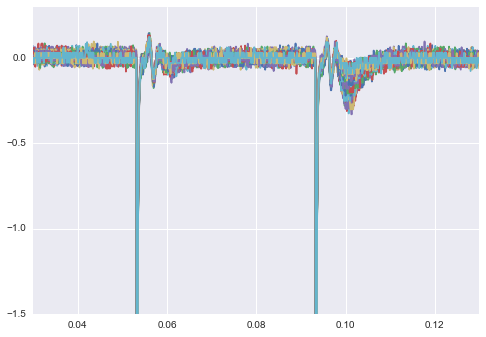

In [41]:
def same_baseline(nps_list, baseline=1250):
    """
    these function takes a list of numpy_arrays that hold the data of 5_pulse stimulations 
    and set them to have the same baseline.
    """
    for numpy_array in nps_list:
        baseline_matrix=numpy_array[baseline:,1:]
        baseline_mean=np.mean(baseline_matrix, axis=0)
        #print(baseline_matrix.shape, baseline_mean.shape)
        numpy_array[:,1:]=numpy_array[:,1:]-baseline_mean
   
    return nps_list
        
list_of_nps_new=same_baseline(list_of_nps)
plt.plot(list_of_nps_new[0][:,0], list_of_nps_new[2][:,1:]); 
plt.ylim(-1.5,0.3)
plt.xlim(0.03,0.13)

'\n550- 567 fiber volley 1 \n570- 605 EPSP1\n950- 967 fiber volley 2 \n970- 1005 EPSP2\n'

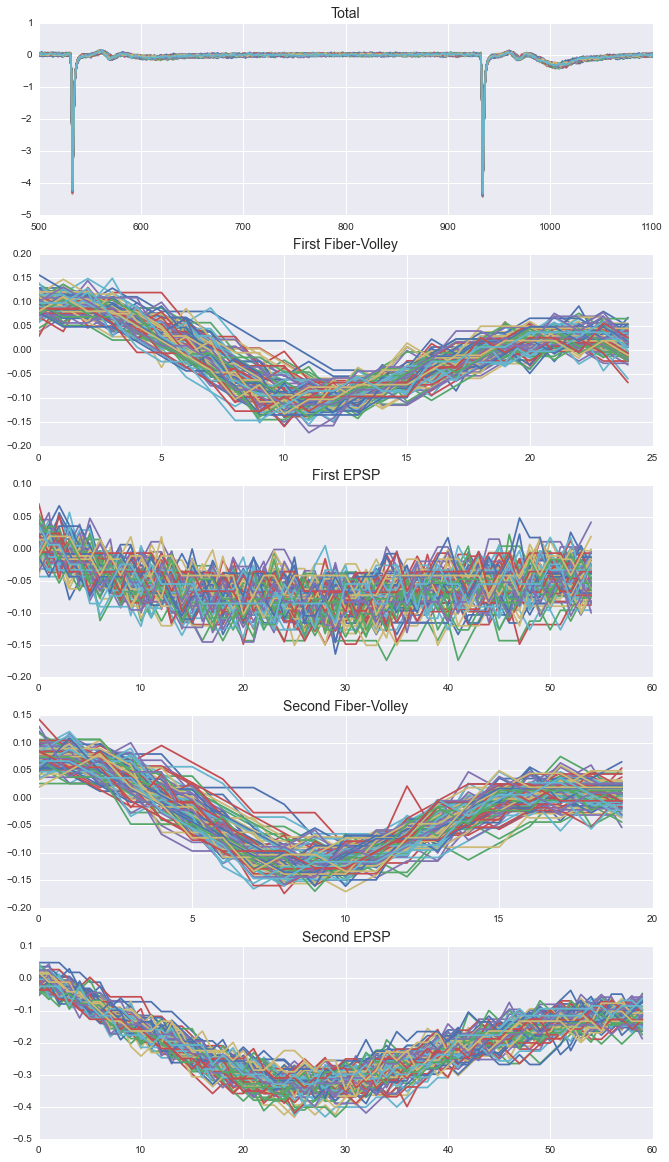

In [66]:

fig, ax = plt.subplots(nrows=5, figsize=(11,20))
ax[0].plot(list_of_nps[1][:,1:]); 
ax[0].set_xlim(500,1100)
ax[1].plot(list_of_nps[1][560:585,1:]); 
ax[2].plot(list_of_nps[1][585:640,1:]);
ax[3].plot(list_of_nps[1][960:980,1:]);
ax[4].plot(list_of_nps[1][980:1040,1:]);
ax[0].set_title('Total', fontsize=14)
ax[1].set_title('First Fiber-Volley', fontsize=14)
ax[2].set_title('First EPSP', fontsize=14)
ax[3].set_title('Second Fiber-Volley', fontsize=14)
ax[4].set_title('Second EPSP', fontsize=14)


"""
550- 567 fiber volley 1 
570- 605 EPSP1
950- 967 fiber volley 2 
970- 1005 EPSP2
"""

In [43]:
def find_amplitudes(list_of_nps):
    list_of_amp_arrays=[]
    for i, data_array in enumerate(list_of_nps):
        data_array=data_array*-1
        amplitude_array=np.zeros((data_array.shape[1]-1,6)) # the minus 1 is the exclude the time vector.
        amplitude_array[:,0]=data_array[560:585,1:].max(axis=0) # the vector of maximum fiber-volley1 for each trace  
        amplitude_array[:,1]=data_array[960:980,1:].max(axis=0) # the vector of maximum fiber-volley2 for each trace 
        amplitude_array[:,2]=data_array[585:640,1:].max(axis=0) # the vector of maximum EPSP1 for each trace 
        amplitude_array[:,3]=data_array[980:1040,1:].max(axis=0) # the vector of maximum EPSP2 for each trace 
        amplitude_array[:,4]=amplitude_array[:,3]/amplitude_array[:,2] # paired pulse ratio
        amplitude_array[:,5]=amplitude_array[:,1]/amplitude_array[:,0] # Fiber-volley ratio
        list_of_amp_arrays.append(amplitude_array)
    print('The number of arrays in the list is:', len(list_of_amp_arrays))
    return list_of_amp_arrays
        
list_of_amps_array=find_amplitudes(list_of_nps_new)

The number of arrays in the list is: 3


In [44]:
#averages and not max ampliutudes
"""
def find_amplitudes(list_of_nps):
    list_of_amp_arrays=[]
    for i, data_array in enumerate(list_of_nps):
        data_array=data_array*-1
        amplitude_array=np.zeros((data_array.shape[1]-1,6)) # the minus 1 is the exclude the time vector.
        amplitude_array[:,0]=data_array[550:567,1:].mean(axis=0) # the vector of maximum fiber-volley1 for each trace  
        amplitude_array[:,1]=data_array[950:967,1:].mean(axis=0) # the vector of maximum fiber-volley2 for each trace 
        amplitude_array[:,2]=data_array[570:605,1:].mean(axis=0) # the vector of maximum EPSP1 for each trace 
        amplitude_array[:,3]=data_array[970:1005,1:].mean(axis=0) # the vector of maximum EPSP2 for each trace 
        amplitude_array[:,4]=amplitude_array[:,3]/amplitude_array[:,2] # paired pulse ratio
        amplitude_array[:,5]=amplitude_array[:,1]/amplitude_array[:,0] # Fiber-volley ratio
        list_of_amp_arrays.append(amplitude_array)
    print('The number of arrays in the list is:', len(list_of_amp_arrays))
    return list_of_amp_arrays
        
list_of_amps_array=find_amplitudes(list_of_nps_new)
"""

"\ndef find_amplitudes(list_of_nps):\n    list_of_amp_arrays=[]\n    for i, data_array in enumerate(list_of_nps):\n        data_array=data_array*-1\n        amplitude_array=np.zeros((data_array.shape[1]-1,6)) # the minus 1 is the exclude the time vector.\n        amplitude_array[:,0]=data_array[550:567,1:].mean(axis=0) # the vector of maximum fiber-volley1 for each trace  \n        amplitude_array[:,1]=data_array[950:967,1:].mean(axis=0) # the vector of maximum fiber-volley2 for each trace \n        amplitude_array[:,2]=data_array[570:605,1:].mean(axis=0) # the vector of maximum EPSP1 for each trace \n        amplitude_array[:,3]=data_array[970:1005,1:].mean(axis=0) # the vector of maximum EPSP2 for each trace \n        amplitude_array[:,4]=amplitude_array[:,3]/amplitude_array[:,2] # paired pulse ratio\n        amplitude_array[:,5]=amplitude_array[:,1]/amplitude_array[:,0] # Fiber-volley ratio\n        list_of_amp_arrays.append(amplitude_array)\n    print('The number of arrays in the l

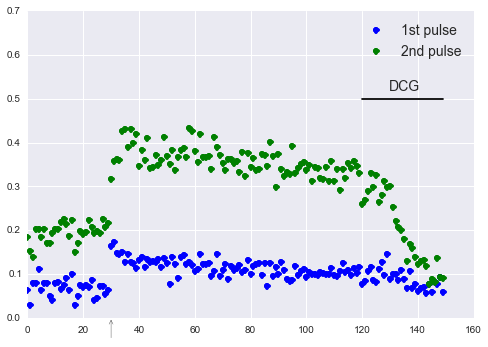

In [47]:
plt.plot(np.arange(30),(list_of_amps_array[0][:,2]),'o', color='b');
plt.plot((np.arange(30,120)),list_of_amps_array[1][:,2],'o', color='b');
plt.plot(np.arange(120,150),list_of_amps_array[2][:,2],'o', color='b', label='1st pulse');
plt.text(130, 0.52,'DCG', fontsize=14)
plt.annotate("", xy=(30, 0.0), xytext=(30, -0.05), arrowprops=dict(arrowstyle="->"))
plt.plot(np.arange(30),(list_of_amps_array[0][:,3]),'o', color='g');
plt.plot((np.arange(30,120)),list_of_amps_array[1][:,3],'o', color='g');
plt.plot(np.arange(120,150),list_of_amps_array[2][:,3],'o', color='g', label='2nd pulse');
plt.plot(np.arange(120,150), np.ones(30)*0.5, color='k')
plt.ylim(0,0.7)
plt.legend(fontsize=14);

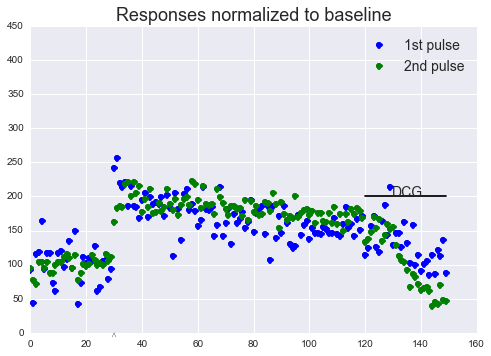

In [48]:
plt.plot(np.arange(30),(list_of_amps_array[0][:,2])/list_of_amps_array[0][:,2].mean()*100,'o', color='b');
plt.plot((np.arange(30,120)),list_of_amps_array[1][:,2]/list_of_amps_array[0][:,2].mean()*100,'o', color='b');
plt.plot(np.arange(120,150),list_of_amps_array[2][:,2]/list_of_amps_array[0][:,2].mean()*100,'o', color='b', label='1st pulse');
plt.text(130, 200,'DCG', fontsize=14)
plt.annotate("", xy=(30, 0.0), xytext=(30, -0.05), arrowprops=dict(arrowstyle="->"))
plt.plot(np.arange(30),(list_of_amps_array[0][:,3]/list_of_amps_array[0][:,3].mean()*100),'o', color='g');
plt.plot((np.arange(30,120)),list_of_amps_array[1][:,3]/list_of_amps_array[0][:,3].mean()*100,'o', color='g');
plt.plot(np.arange(120,150),list_of_amps_array[2][:,3]/list_of_amps_array[0][:,3].mean()*100,'o', color='g', label='2nd pulse');
plt.plot(np.arange(120,150), np.ones(30)*200, color='k')
plt.legend(fontsize=14);
plt.ylim(0,450)
plt.title('Responses normalized to baseline', fontsize=18)

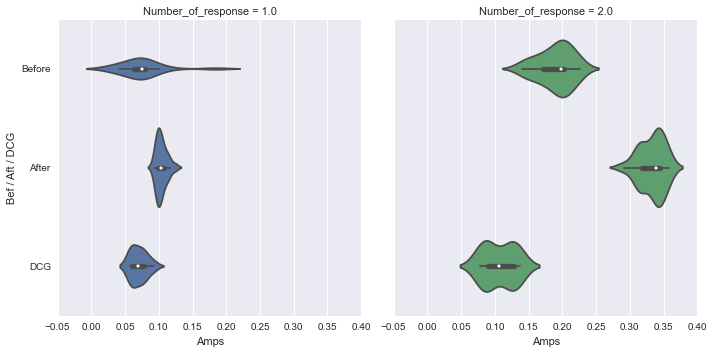

In [63]:
before_amp1=list_of_amps_array[0][:20,2] # first 20 responses - 1st pulse
after_amp1=list_of_amps_array[1][-20:,2] # last 20 responses before DCG - 1st pulse
before_amp2=list_of_amps_array[0][:20,3] # first 20 responses - 2nd pulse
after_amp2=list_of_amps_array[1][-20:,3] # last 20 responses before DCG - 2nd pulse
DCG_amp1=list_of_amps_array[2][20:,2] # last 10 responses after DCG application - 1st pulse 
DCG_amp2=list_of_amps_array[2][20:,3] # last 10 responses after DCG application - 2nd pulse 
total_amps=np.concatenate((before_amp1, after_amp1, DCG_amp1, before_amp2, after_amp2, DCG_amp2))
Befors = ["Before" for x in range(20)]
Afters = ["After" for x in range(20)]
DCGs = ["DCG" for x in range(10)]
bef_aft_vector=np.concatenate((Befors, Afters, DCGs, Befors, Afters, DCGs))
amp_numbers=np.ones(100)
amp_numbers[51:]=2
S={'Amps': total_amps , 'Bef / Aft / DCG': bef_aft_vector, 'Number_of_response': amp_numbers}
S=pd.DataFrame(S)
#print(S, '\n', type(S))
g = sns.FacetGrid(S, col='Number_of_response', hue='Number_of_response', size=5, sharey=True)
g.map(sns.violinplot, 'Amps', 'Bef / Aft / DCG')
sns.despine()


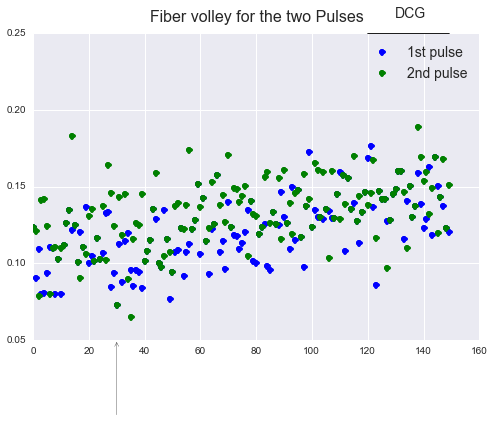

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(30),(list_of_amps_array[0][:,0]),'o', color='b');
plt.plot((np.arange(30,120)),list_of_amps_array[1][:,0],'o', color='b');
plt.plot(np.arange(120,150),list_of_amps_array[2][:,0],'o', color='b', label='1st pulse');
plt.text(130,0.26,'DCG', fontsize=14)
ax.annotate("", xy=(30, 0.05), xytext=(30, 0), arrowprops=dict(arrowstyle="->"))
plt.plot(np.arange(30),(list_of_amps_array[0][:,1]),'o', color='g');
plt.plot((np.arange(30,120)),list_of_amps_array[1][:,1],'o', color='g');
plt.plot(np.arange(120,150),list_of_amps_array[2][:,1],'o', color='g', label='2nd pulse');
plt.plot(np.arange(120,150), np.ones(30)*0.25, color='k')
plt.legend(fontsize=14)
#plt.ylim(0,0.45)
plt.title('Fiber volley for the two Pulses', fontsize=16, y=1.02);

the t-value and p-value are:  Ttest_relResult(statistic=-5.6555337549435558, pvalue=7.6993382098302464e-08)


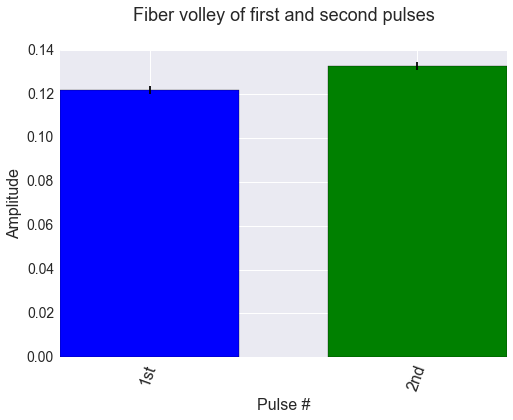

In [51]:
first_fiber= np.concatenate((list_of_amps_array[0][:,0], list_of_amps_array[1][:,0], list_of_amps_array[2][:,0] ))
second_fiber= np.concatenate((list_of_amps_array[0][:,1], list_of_amps_array[1][:,1], list_of_amps_array[2][:,1] ))
plt.bar([1.3,1.6], [first_fiber.mean(), second_fiber.mean()], width=0.2, color=['b','g'], yerr=[first_fiber.std()/ (len(first_fiber)**0.5) ,second_fiber.std()/(len(second_fiber)**0.5) ], ecolor='k');        
plt.title('Fiber volley of first and second pulses', fontsize=18,y=1.08);
plt.xlabel('Pulse #', fontsize=16);
plt.ylabel('Amplitude', fontsize=16);
plt.xticks([1.4,1.7],['1st', '2nd'], rotation=70, fontsize=16);
plt.yticks(fontsize=14);
print('the t-value and p-value are: ', stats.ttest_rel(first_fiber,second_fiber)) # t-test for related/dependent measurements.

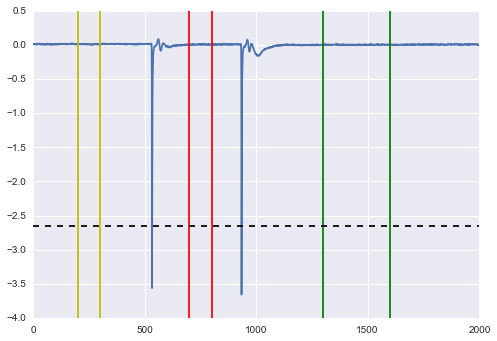

In [52]:
plt.plot(list_of_nps_new[0].mean(axis=1))
plt.axvline(200, color='y')
plt.axvline(300, color='y')
plt.axvline(1300, color='g')
plt.axvline(1600,color='g')
plt.axvline(700, color='r')
plt.axvline(800,color='r')
plt.axhline(-2.66, color='k', ls='dashed')

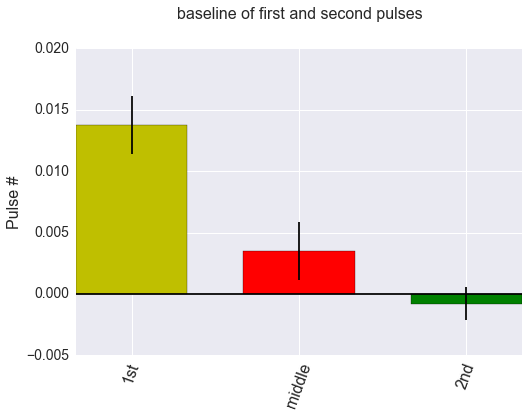

In [53]:
first_baseline=np.concatenate((list_of_nps_new[0][200:300,1:],list_of_nps_new[1][200:300,1:], list_of_nps_new[2][200:300,1:]), axis=1)
second_baseline=np.concatenate((list_of_nps_new[0][1300:1600,1:], list_of_nps_new[1][1300:1600,1:], list_of_nps_new[2][1300:1600,1:]), axis=1)
third_baseline=np.concatenate((list_of_nps_new[0][700:800,1:], list_of_nps_new[1][700:800,1:], list_of_nps_new[2][700:800,1:]), axis=1)
plt.bar([1.3,1.6, 1.9], [first_baseline.mean(), third_baseline.mean(), second_baseline.mean()], width=0.2, color=['y','r','g'], yerr=[first_baseline.std()/ (len(first_baseline)**0.5) , third_baseline.std()/(len(third_baseline)**0.5), second_baseline.std()/(len(second_baseline)**0.5) ], ecolor='k');        
plt.title('baseline of first and second pulses', fontsize=16,y=1.08);
plt.ylabel('Pulse #', fontsize=16);
plt.xticks([1.4,1.7, 2],['1st', 'middle', '2nd'], rotation=70, fontsize=16);
plt.yticks(fontsize=14);
plt.axhline(0,color='k');
#print('the t-value and p-value are: ', stats.ttest_rel(first_baseline,second_baseline)); # t-test for related/dependent measurements.

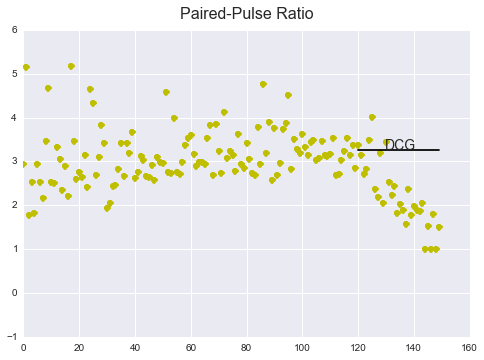

In [54]:
plt.plot(np.arange(30),(list_of_amps_array[0][:,4]),'o', color='y');
plt.plot((np.arange(30,120)),list_of_amps_array[1][:,4],'o', color='y');
plt.plot(np.arange(120,150),list_of_amps_array[2][:,4],'o', color='y');
plt.text(130,3.26,'DCG', fontsize=14)
plt.plot(np.arange(120,150), np.ones(30)*3.25, color='k')
plt.title('Paired-Pulse Ratio', fontsize=16, y=1.02);

plt.ylim(-1,6);

30 30
the t-value and p-value are:  Ttest_relResult(statistic=-0.9298773296279419, pvalue=0.36011092999608252)


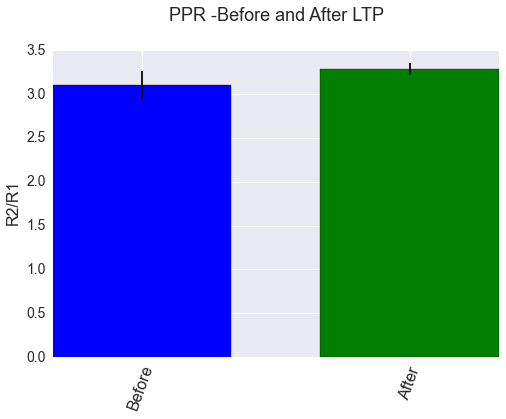

In [55]:
PPR_before= (list_of_amps_array[0][:,4])
PPR_after= (list_of_amps_array[1][60:,4])
print(len(PPR_before), len(PPR_after))
plt.bar([1.3,1.6], [PPR_before.mean(), PPR_after.mean()], width=0.2, color=['b','g'], yerr=[PPR_before.std()/ (len(PPR_before)**0.5) ,PPR_after.std()/(len(PPR_after)**0.5) ], ecolor='k');        
plt.title('PPR -Before and After LTP', fontsize=18,y=1.08);
plt.ylabel('R2/R1', fontsize=16);
plt.xticks([1.4,1.7],['Before', 'After'], rotation=70, fontsize=16);
plt.yticks(fontsize=14);
print('the t-value and p-value are: ', stats.ttest_rel(PPR_before,PPR_after)) # t-test for related/dependent measurements.

(0, 4)

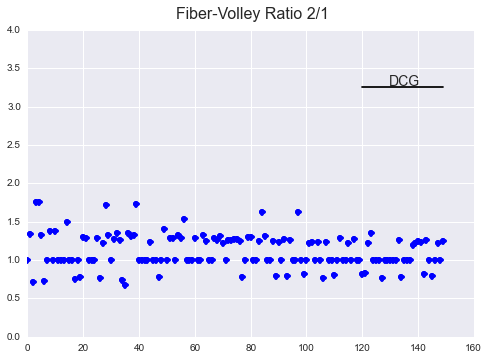

In [57]:
plt.plot(np.arange(30),(list_of_amps_array[0][:,5]),'o', color='b');
plt.plot((np.arange(30,120)),list_of_amps_array[1][:,5],'o', color='b');
plt.plot(np.arange(120,150),list_of_amps_array[2][:,5],'o', color='b');
plt.text(130,3.28,'DCG', fontsize=14)
ax.annotate("", xy=(30, 0.5), xytext=(30, 0), arrowprops=dict(arrowstyle="->"))
plt.plot(np.arange(120,150), np.ones(30)*3.25, color='k')
plt.title('Fiber-Volley Ratio 2/1', fontsize=16, y=1.02);
plt.ylim(0,4)

In [51]:
"""
print(list_of_amps_array[1][:,5].argmax(), list_of_amps_array[1][:,5].max())
print(list_of_amps_array[1][77,1], list_of_amps_array[1][77,0], list_of_amps_array[1][81,1]/  list_of_amps_array[1][77,0], list_of_amps_array[1][77,5])
"""

'\nprint(list_of_amps_array[1][:,5].argmax(), list_of_amps_array[1][:,5].max())\nprint(list_of_amps_array[1][77,1], list_of_amps_array[1][77,0], list_of_amps_array[1][81,1]/  list_of_amps_array[1][77,0], list_of_amps_array[1][77,5])\n'

In [16]:
"""
fig, ax = plt.subplots(nrows=1, figsize=(14,4))
plt.plot(list_of_nps_new[1][500:1100, 78])
plt.ylim(-0.35,0.01)
plt.axhline(-0.04)
"""

'\nfig, ax = plt.subplots(nrows=1, figsize=(14,4))\nplt.plot(list_of_nps_new[1][500:1100, 78])\nplt.ylim(-0.35,0.01)\nplt.axhline(-0.04)\n'